In [1]:
# These codes were solely written by MATTHEW NG WEI CHEN during the Hack&Roll 2024 hackathon, which was graciously organised by NUS Hackers!
# I deeply thank their team for giving me this wonderful opportunity to showcase my passion project. The event really means a lot to me.
# Also, if you are referencing my work, please credit me:
# GitHub : @MatthewYay
# LinkedIn : https://www.linkedin.com/in/matthew-ng-wc/

In [2]:
from IPython.display import clear_output  #removing the display of graphs
from nltk.chat.util import Chat  #Creating simple chatbots using Natural Language Toolkit library
import matplotlib.pyplot as plt  #for creating various types of plots
import numpy as np  #reading and processing large multidimensional arrays and matrices
import re  #supports regular expressions (for pattern-matching, text manipulation, etc)
import random  #generating random numbers / making random selections
import pandas as pd  #data manipulation / analysis through DataFrames
from keras.utils import to_categorical  #converts integer labels into one-hot encoded vectors
import keras  #deep-learning framework providing an interface for building & training neural networks
from keras.preprocessing.text import Tokenizer  #For text preprocessing (e.g. converting text into sequences of integers)
from keras.preprocessing.sequence import pad_sequences  #ensures all sequences are of same lengths through padding / truncating
from keras.models import Sequential  #builds neural networks layer by layer, in sequence
import os  #maybe not needed just trying
from sklearn.metrics import classification_report  #generates report of precision, recall, F1-score & support for every class
import scikitplot  #helps visualize classification results
from keras.layers import LSTM,Bidirectional, Dense, Embedding, Dropout  #imports specific layers as building blocks in neural networks. LSTM is recurrent, Bidirectional wraps another layer to make it go 2 ways, Dense is a fully connected layer, Embedding embeds words, Dropout is a regularization layer.
from scikitplot.metrics import plot_confusion_matrix  #evaluates performance of classification model

In [3]:
# Storing contents of test.txt and train.txt into dataframes
dataframeTest = pd.read_csv("test.txt",header=None,sep=";",names=["Text", "Sentiment"],encoding="utf-8")
dataframeTrain = pd.read_csv("train.txt",header=None,sep=";",names=["Text", "Sentiment"],encoding="utf-8")

In [4]:
# converting column names into numbers, contain values of dataframe's text column in a variable
dataframeTrain["Sentiment"] = dataframeTrain.Sentiment.replace({"joy":0,"anger":1,"love":2,"sadness":3,"fear":4,"surprise":5})
dataframeTrainTextColumn = dataframeTrain["Text"]

In [5]:
# tokenizer has vocab size of 15212 lower-case words. Words not in this dictionary will be given a "UNK" token
# tokenizer is fitted on dataframe's text data. Tokenizer's internal vocab is built on frequency of words.
tokenizer = Tokenizer(15212,lower=True,oov_token="UNK")
tokenizer.fit_on_texts(dataframeTrainTextColumn)

In [6]:
#converts textual data in df into sequences of tokens. Thereafter, they are padded with zeros to ensure all sequences are the same length.
dataframeTrainTextColumn_train = tokenizer.texts_to_sequences(dataframeTrainTextColumn)
dataframeTrainTextColumn_train_paded = pad_sequences(dataframeTrainTextColumn_train,maxlen=80,padding="post")

In [7]:
# Extracts & stores numerical sentiment labels. Then, they are converted into categorical form using one-hot encoding
sentimentValues_train = dataframeTrain["Sentiment"].values
sentimentValues_train_categorized = to_categorical(sentimentValues_train)

In [8]:
# creating sequential model with 64-dimensional embeddings, with drop-out rate of 0.6 to prevent overfitting, etc. Summary of it below.

deepLearningModel = Sequential()
deepLearningModel.add(Embedding(15212,64,input_length=80))
deepLearningModel.add(Dropout(0.6))
deepLearningModel.add(Bidirectional(LSTM(80,return_sequences=True)))
deepLearningModel.add(Bidirectional(LSTM(160)))
deepLearningModel.add(Dense(6,activation="softmax"))

print(deepLearningModel.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 64)            973568    
                                                                 
 dropout (Dropout)           (None, 80, 64)            0         
                                                                 
 bidirectional (Bidirection  (None, 80, 160)           92800     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 320)               410880    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 1926      
                                                                 
Total params: 1479174 (5.64 MB)
Trainable params: 14791

In [9]:
#for compiling neural network model with Adam optimizer & crossentropy function
deepLearningModel.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [10]:
#here I train the modelby fitting it on padded tokenized sequences and categorical sentiment
producingIterations = deepLearningModel.fit(dataframeTrainTextColumn_train_paded,sentimentValues_train_categorized,epochs=2)

Epoch 1/2


500/500 [==============================] - 87s 162ms/step - loss: 1.2202 - accuracy: 0.5269
Epoch 2/2
500/500 [==============================] - 75s 150ms/step - loss: 0.4958 - accuracy: 0.8230


In [11]:
#Saving trained deep learning model and its weights into separate files!
deepLearningModel.save("deepLearningModel.h5")
deepLearningModel.save_weights("deepLearningModelWeights.h5")

c:\Users\matth\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
#Extract textual data from Text 
test_X=dataframeTest["Text"]
test_Y=dataframeTest.Sentiment.replace({"joy":0,"anger":1,"love":2,"sadness":3,"fear":4,"surprise":5})

In [13]:
#Converts test textual data into sequences of tokens using fitted tokenizer, then pad them with zeros
test_X_tokens_f = tokenizer.texts_to_sequences(test_X)
test_X_pads = pad_sequences(test_X_tokens_f,maxlen=80,padding="post")

In [14]:
#converting into categorical form using one-hot encoding
testing_Y_and_f = to_categorical(test_Y)

In [15]:
# here are the loss values and accuracy of my model
deepLearningModel.evaluate(test_X_pads,testing_Y_and_f)

63/63 [==============================] - 3s 30ms/step - loss: 0.3346 - accuracy: 0.8800


[0.33460965752601624, 0.8799999952316284]

In [16]:
#converting predicted sentiment labels from probability vectors into numbers, by selecting highest probability
predicting_y = deepLearningModel.predict(test_X_pads)
predicting_y = np.argmax(predicting_y,axis=1)

63/63 [==============================] - 3s 32ms/step


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

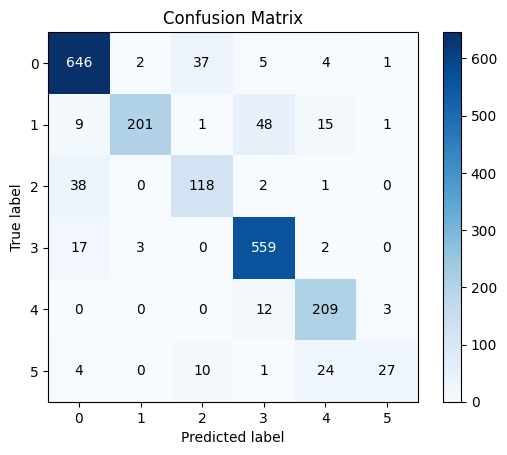

In [17]:
#confusion matrix analyzes model performance, compared to the real sentiment labels
plot_confusion_matrix(test_Y,predicting_y)

In [18]:
#Here is a report of my precision, recall & f1-score for all fields!
print(classification_report(test_Y,predicting_y))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       695
           1       0.98      0.73      0.84       275
           2       0.71      0.74      0.73       159
           3       0.89      0.96      0.93       581
           4       0.82      0.93      0.87       224
           5       0.84      0.41      0.55        66

    accuracy                           0.88      2000
   macro avg       0.86      0.78      0.80      2000
weighted avg       0.88      0.88      0.88      2000



In [19]:
#get_key converts numerical sentiment into its appropriate sentiment label.
def get_key(value):
    sentimentDictionary = {"joy":0,"anger":1,"love":2,"sadness":3,"fear":4,"surprise":5}
    for i, j in sentimentDictionary.items():
        if j==value:
            return i

In [20]:
#Predicting the sentiment label for new input sentence afterwards.
def predict(sentence):
    sentence_list = []
    sentence_list.append(sentence)
    modelPrediction = deepLearningModel.predict(pad_sequences((tokenizer.texts_to_sequences(sentence_list)),maxlen=80,padding="post"))
    modelPrediction = np.argmax(modelPrediction, axis=1)
    predictedResult = get_key(modelPrediction)
    return predictedResult

In [21]:
# doing some test cases in ipynb file before actually using my DL models on my actual emPetAIze app

input_sentiment = input("Good day to you! :-) How are you feeling currently at this time?")
result = predict(input_sentiment)
while input_sentiment != "yadiyadiyada":
    if result == "joy":
        print("User is joyful!")
    elif result == "anger":
        print("User is angry.")
    elif result == "love":
        print("Oh that's lovely")
    elif result == "sadness":
        print("User is sad")
    elif result == "fear":
        print("User is fearful")
    elif result == "surprise":
        print("User feels surprised.")
    else:
        print("User's emotion not recognized.")

    input_sentiment = input("Good day to you! :-) How are you feeling currently at this time?")
    result = predict(input_sentiment)

print("User has quit")

# Whilst test cases here are mostly accurate, my model sometimes misinterprets inputs with positive connotations as having a negative sentiment. It is not 100% correct and accurate, as the dataset used for supervising the model is not big enough in my opinion.
# But no worries. I will counteract this in my app by adding a layer of TextBlob / NLTK's SentimentIntensityAnalyzer, to doublecheck and further filter inputs according to their relevant sentiments.

1/1 [==============================] - 0s 76ms/step
User is angry.
1/1 [==============================] - 0s 72ms/step
User is angry.
1/1 [==============================] - 0s 56ms/step
User is angry.
1/1 [==============================] - 0s 57ms/step
User is sad
1/1 [==============================] - 0s 57ms/step
User is angry.
1/1 [==============================] - 0s 53ms/step
User is angry.
1/1 [==============================] - 0s 56ms/step
User is angry.
1/1 [==============================] - 0s 55ms/step
User is sad
1/1 [==============================] - 0s 55ms/step
User has quit
